# Escalamiento de datos numéricos

### Transformaciones lineales

In [45]:
import timeit
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

X, y = datasets.load_diabetes(return_X_y=True)
raw = X[:, None, 2]

La transformación: **raw = X[:, None, 2]**

Esta transformación puede crear un poco de confusión si no conoces algunos detalles sobre NumPy. Para las dudas te detallo un poco que hizo en esta línea de código.

**Note**: X tiene un shape de (442, 10) para nuestro estudio solo necesitamos una columna, buscamos tener un raw con shape (442, 1)

1. **:** Toma todas las columnas y filas.
2. **None** indica la transformación del arreglo (newaxis)
3. **2** Selecciona la 3ra columna de X.
Más información sobre Numpy Newaxis https://numpy.org/doc/stable/reference/constants.html#numpy.newaxis

Detalles del dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

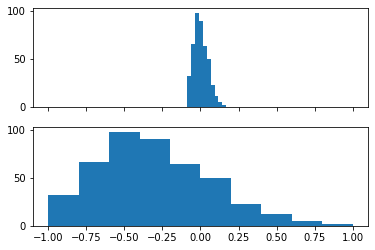

In [46]:
# escalamiento max-min
max_raw = max(raw)
min_raw = min(raw)

scaled = (2*raw - max_raw - min_raw)/(max_raw - min_raw)

# es importante tener una noción de los datos originales antes y después de escalarlos:

fig, axs = plt.subplots(2,1, sharex=True )

axs[0].hist(raw)
axs[1].hist(scaled)

In [47]:
# modelos para entrenamiento

def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

In [48]:
raw_time = timeit.timeit(train_raw, number=100) #repite la ejecución del código 100 veces y sobre eso calcula el tiempo
scaled_time = timeit.timeit(train_scaled, number=100)
print(f'train raw: {raw_time}')
print(f'train scaled: {scaled_time}')

train raw: 0.036052374001883436
train scaled: 0.0326226309989579


* max-min scaling: mejor para datos uniformemente distribuidos
* z-score scaling: mejor para datos distribuidos "normalmente" (forma de campana de gauss)

In [56]:
# escalamiento Z-score
avg = np.average(raw) #Promedio
std = np.std(raw) #Desviacion estandar

z_scaled = (raw-avg)/std

# modelos para entrenamiento

def train_raw_z_score():
    linear_model.LinearRegression().fit(raw, y)

def train_z_score():
    linear_model.LinearRegression().fit(z_scaled, y)

raw_time = timeit.timeit(train_raw_z_score, number= 1000)
z_scaled_time = timeit.timeit(train_z_score, number = 1000)

print(f'train raw: {raw_time}')
print(f'train scaled: {z_scaled_time}')

# es importante tener una noción de los datos originales antes y después de escalarlos:


train raw: 0.33296715399774257
train scaled: 0.3839859700019588


(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([-1.89792941, -1.34956464, -0.80119987, -0.2528351 ,  0.29552967,
         0.84389444,  1.39225921,  1.94062398,  2.48898875,  3.03735352,
         3.58571828]),
 <BarContainer object of 10 artists>)

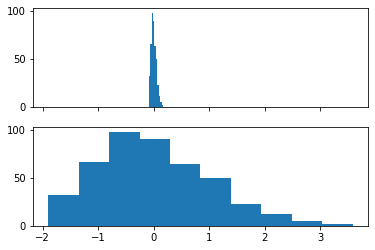

In [62]:
fig, axs = plt.subplots(2,1, sharex=True )

axs[0].hist(raw)
axs[1].hist(z_scaled)

Utilidades de Scikit Learn : https://scikit-learn.org/stable/modules/preprocessing.html

### Transformaciones no lineales

In [49]:
df = pd.read_csv('cars.csv')

<AxesSubplot:>

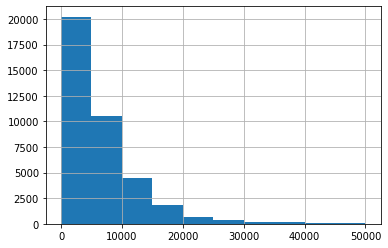

In [50]:
df.price_usd.hist()

Transformación con $$tanh(x)$$

<AxesSubplot:>

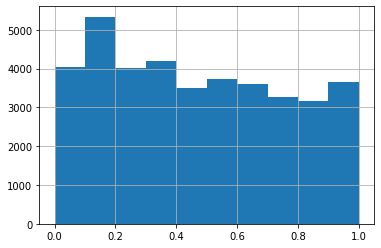

In [54]:
# Transformación con tanh(x)

# Esta línea toma la columna y le aplica a toda una función matemática
p = 10000
df.price_usd.apply(lambda x : np.tanh(x/p)).hist()

* mapear datos a una distribucion gaussiana: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html#sphx-glr-auto-examples-preprocessing-plot-map-data-to-normal-py

Automatically created module for IPython interactive environment


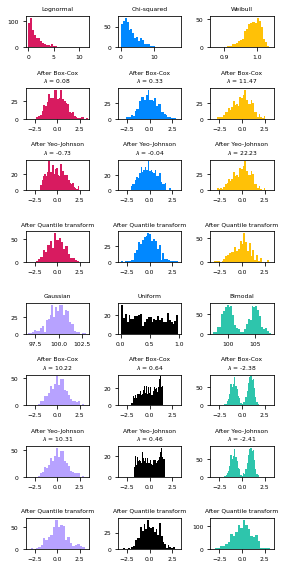

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c7269bf3-db96-4ae8-8627-d789ea473aa9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>